In [ ]:
# !pip install import_ipynb

In [3]:
import warnings
warnings.filterwarnings('ignore')

# import import_ipynb
# from Preprocessing_05 import X_train_lowcorr, X_test_lowcorr, Y_train, Y_test, data, X, df_labels

#import error 뜬다면 !pip uninstall scipy, !pip install scipy==1.1.0

In [4]:
import math
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import multivariate_normal # 가우시안 분포
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [5]:
df = pd.read_csv('preprocessed(MinMax).csv')
df

,age,campaign,day,previous,0,1,2,4,6,8,...,12,14,16,job_0,job_1,job_2,job_3,month_1,month_3,y
0,0.337662,0.000000,0.800000,0.000000,-0.313533,1.394495,0.000000,1.0,0.0,0.0,...,0.0,0.0,0.0,0,1,0,0,0,0,0
1,0.311688,0.081633,0.500000,0.000000,-0.215817,0.633028,0.000000,1.0,0.0,0.0,...,0.0,0.0,0.0,0,0,1,1,0,1,0
2,0.480519,0.020408,0.333333,0.000000,-0.219332,0.206422,0.000000,1.0,0.0,1.0,...,0.0,0.0,0.0,0,0,0,1,0,0,0
3,0.246753,0.061224,0.733333,0.000000,0.075923,0.100917,0.000000,1.0,0.0,0.0,...,1.0,1.0,0.0,0,1,0,1,0,1,0
4,0.207792,0.000000,0.266667,0.003636,-0.024605,0.417431,29.454545,1.0,0.0,0.0,...,1.0,1.0,0.0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30902,0.714286,0.000000,0.533333,0.029091,1.671002,0.545872,3.727273,1.0,0.0,0.0,...,0.0,0.0,0.0,1,0,0,1,1,0,1
30903,0.090909,0.020408,0.533333,0.000000,0.022496,0.940367,0.000000,0.0,0.0,0.0,...,0.0,1.0,0.0,0,0,1,1,1,0,1
30904,0.428571,0.040816,0.533333,0.000000,0.247452,3.651376,0.000000,1.0,0.0,1.0,...,0.0,0.0,0.0,0,0,1,1,1,0,1
30905,0.688312,0.020408,0.533333,0.000000,0.882953,1.261468,0.000000,0.0,1.0,0.0,...,0.0,0.0,0.0,1,0,0,1,1,0,1


In [6]:
df.columns

Index(['age', 'campaign', 'day', 'previous', '0', '1', '2', '4', '6', '8',
       '10', '12', '14', '16', 'job_0', 'job_1', 'job_2', 'job_3', 'month_1',
       'month_3', 'y'],
      dtype='object')

In [7]:
# 정상/이상 구분
normal = df.loc[df['y'] == 0]
anomaly = df.loc[df['y'] == 1]

# 행 shuffle 후 위에서 4513개 --> test
normal_shuffled=normal.sample(frac=1, random_state=3).reset_index(drop=True) #shuffling
normal_shuffled_test = normal_shuffled[:4513]
normal_shuffled_train = normal_shuffled[4513:]

# train에 쓰이는 정상 데이터 X, Y 구분
X_train = normal_shuffled_train[normal_shuffled_train.columns.difference(['y'])]
Y_train = normal_shuffled_train["y"]

# test에 쓰이는 정상 데이터 X, Y 구분 (샘플링)
X_normal_shuffled_test = normal_shuffled_test[normal_shuffled_test.columns.difference(['y'])]
Y_normal_shuffled_test = normal_shuffled_test["y"]

# test에 쓰이는 이상 데이터 X, Y 구분
X_anomaly = anomaly[anomaly.columns.difference(['y'])]
y_anomaly = anomaly["y"]

X_test = pd.concat([X_normal_shuffled_test, X_anomaly])
Y_test = pd.concat([Y_normal_shuffled_test, y_anomaly])

X_train.columns

Index(['0', '1', '10', '12', '14', '16', '2', '4', '6', '8', 'age', 'campaign',
       'day', 'job_0', 'job_1', 'job_2', 'job_3', 'month_1', 'month_3',
       'previous'],
      dtype='object')

In [8]:
trainset = pd.concat([X_train,Y_train],axis = 1)
testset = pd.concat([X_test,Y_test],axis = 1)
X_pr = pd.concat([X_train, X_test],axis=0)
dataset = pd.concat([trainset,testset],axis = 0)

Normal = dataset.loc[dataset['y'] == 0]
Anomaly = dataset.loc[dataset['y'] == 1]

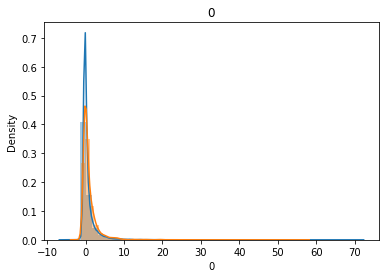

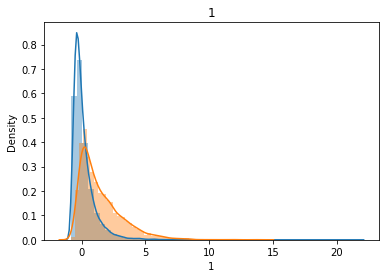

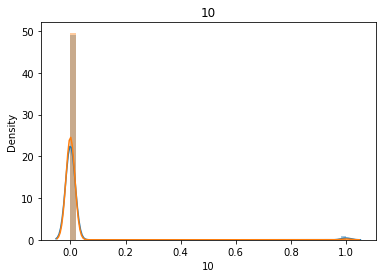

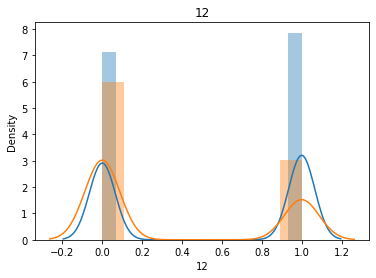

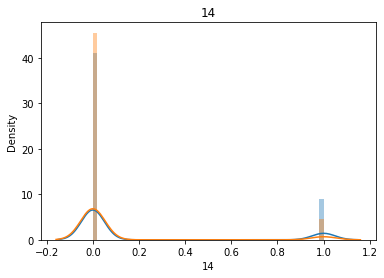

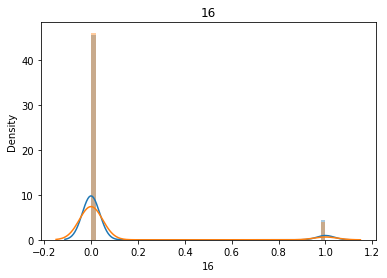

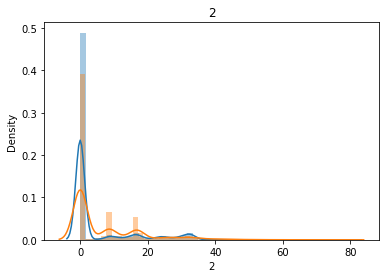

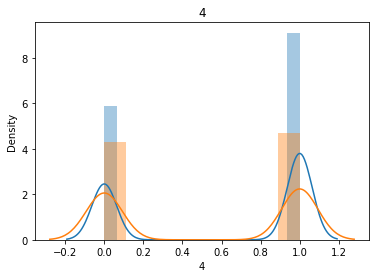

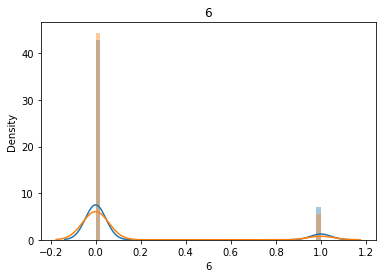

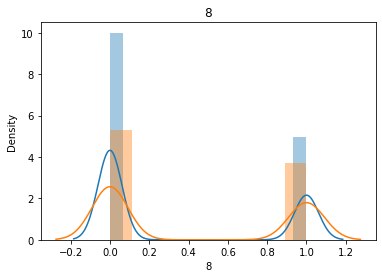

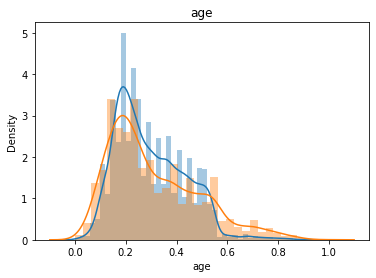

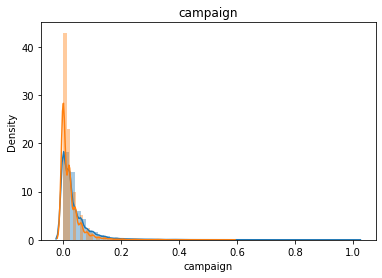

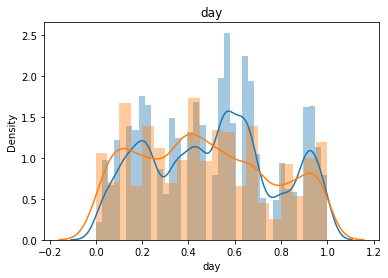

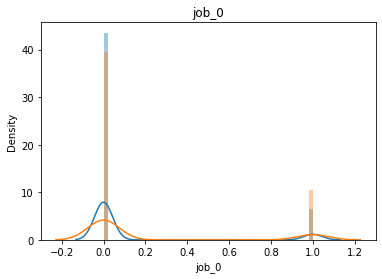

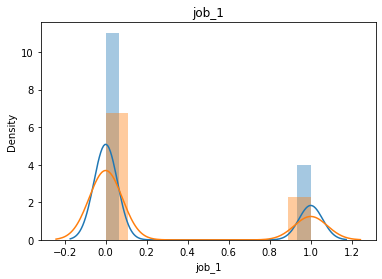

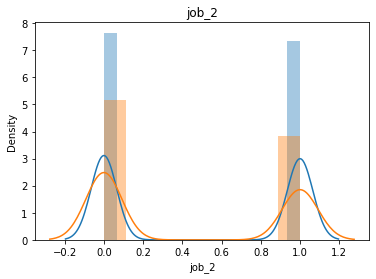

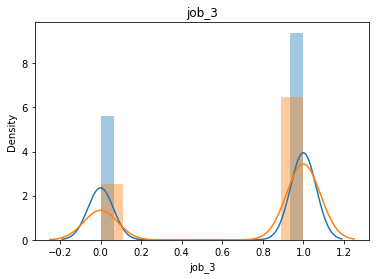

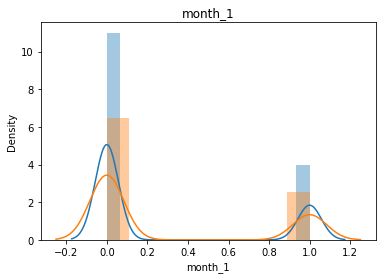

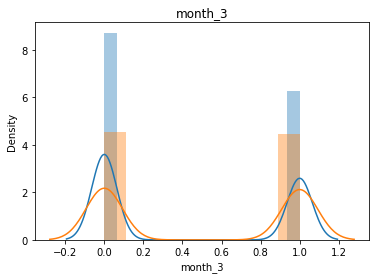

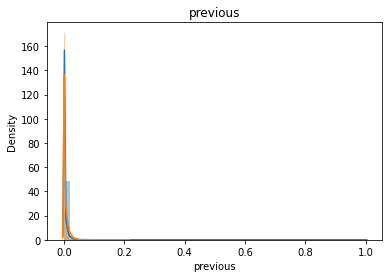

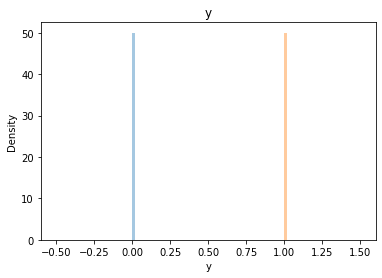

In [ ]:
#정상과 이상 데이터의 변수별 분포 확인 # 정상이 파랑색, 이상이 주황색

for col in dataset.columns:
    sns.distplot(Normal.loc[Normal[col].notnull(), col])
    sns.distplot(Anomaly.loc[Anomaly[col].notnull(), col])
    plt.title(col)
    plt.show()

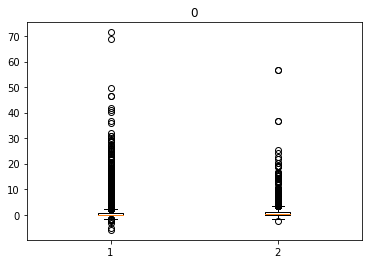

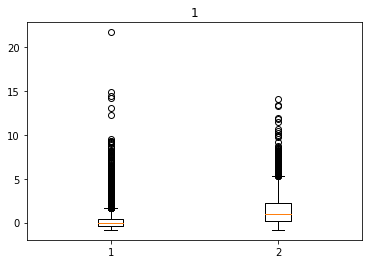

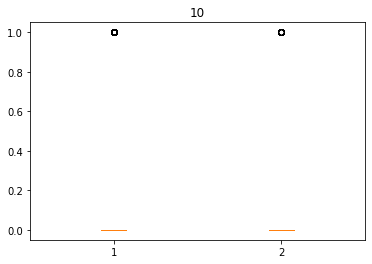

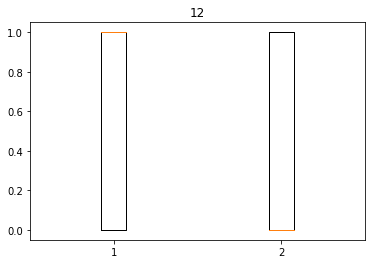

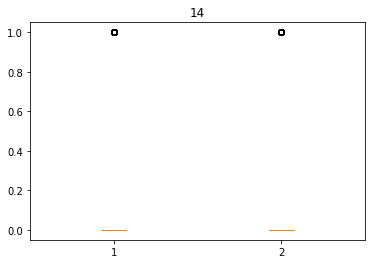

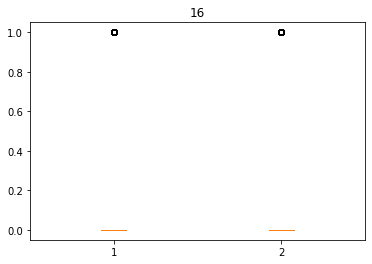

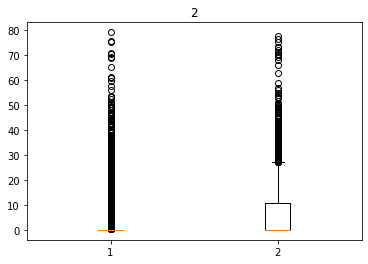

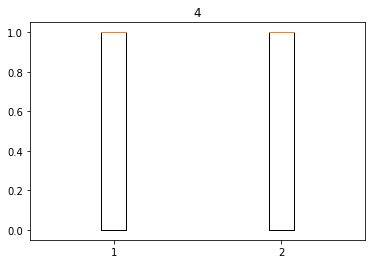

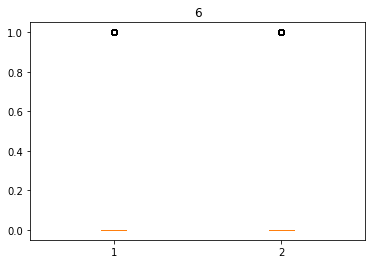

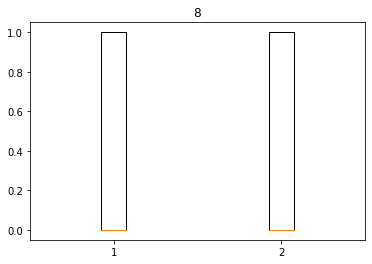

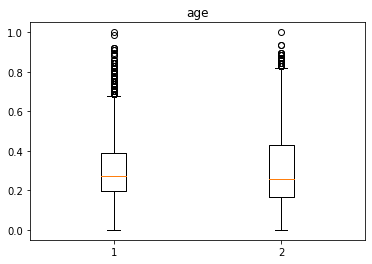

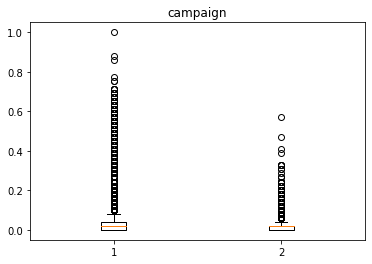

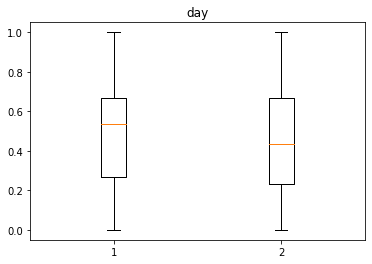

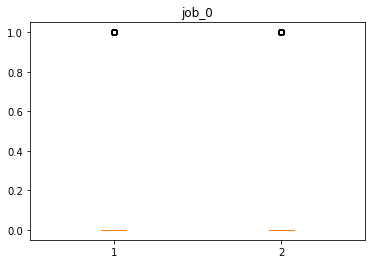

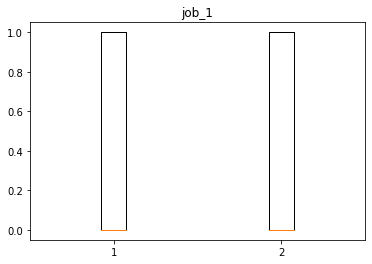

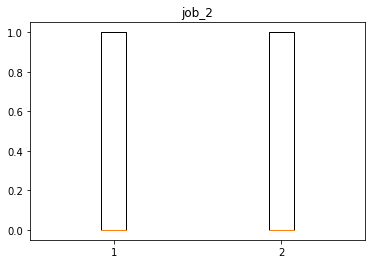

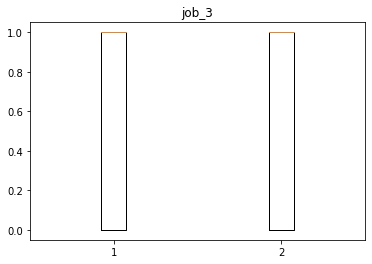

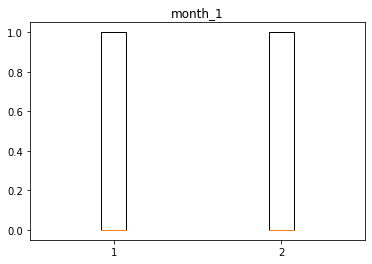

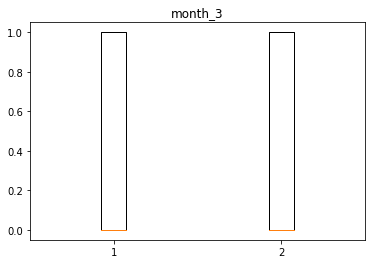

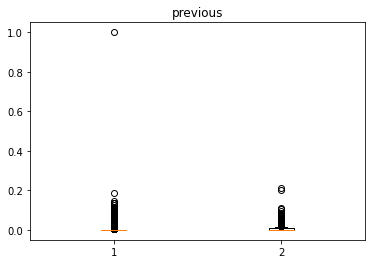

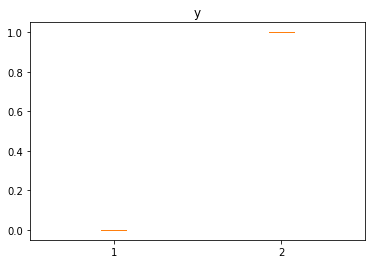

In [ ]:
#정상과 이상 데이터의 변수별 분포 확인 # 정상이 파랑색, 이상이 주황색
for col in dataset.columns:
  fig, ax = plt.subplots()
  ax.boxplot([Normal[col], Anomaly[col]])
  plt.title(col)
  plt.show()

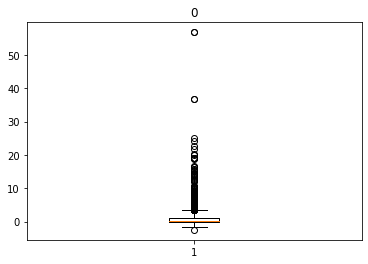

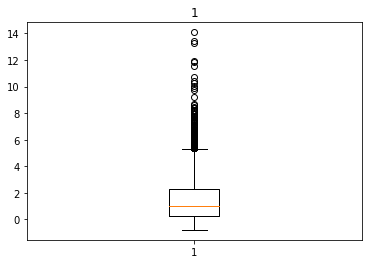

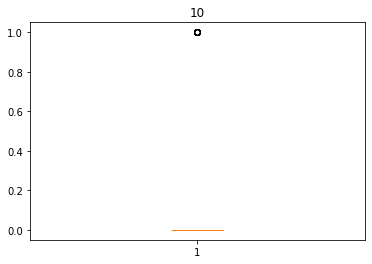

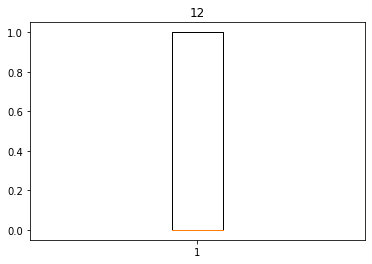

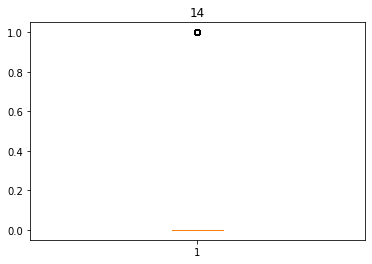

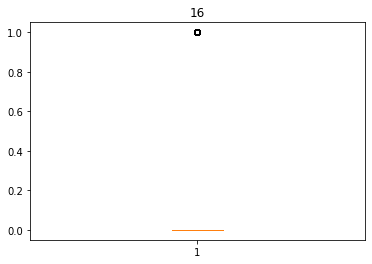

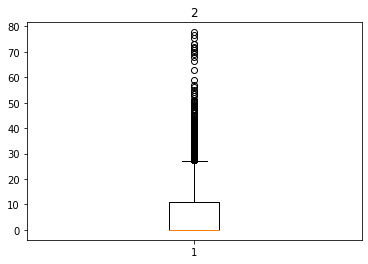

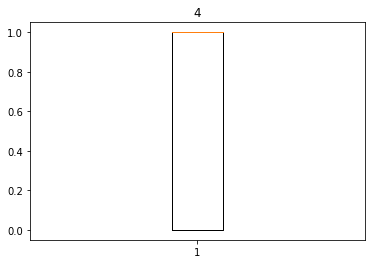

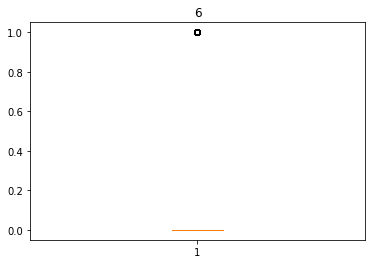

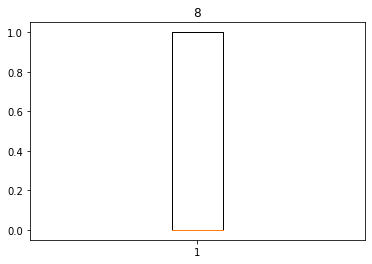

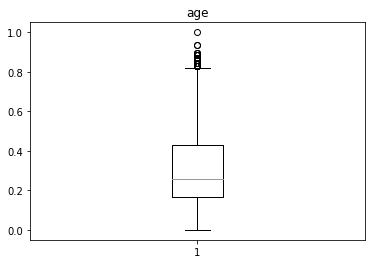

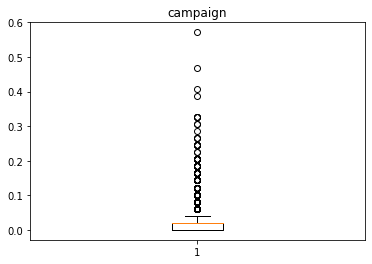

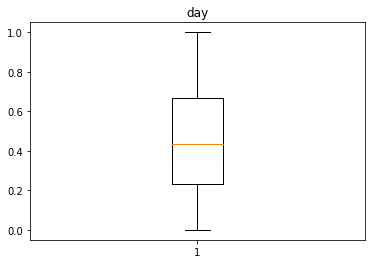

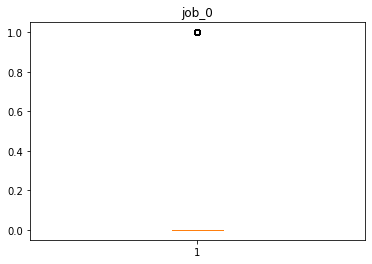

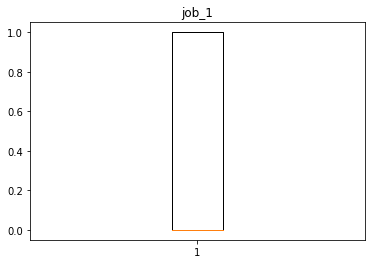

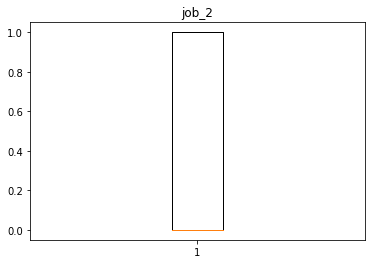

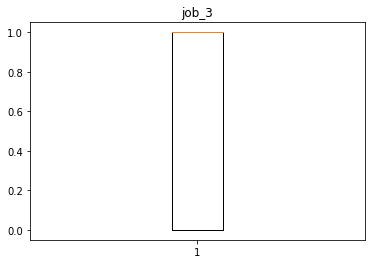

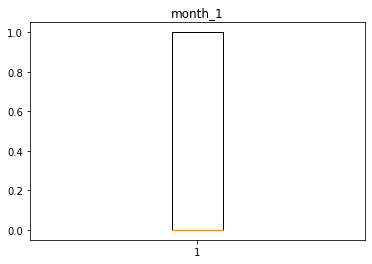

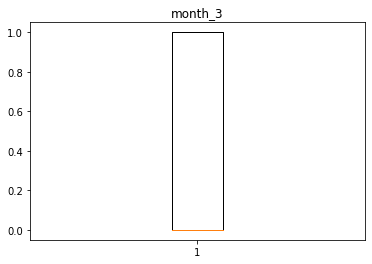

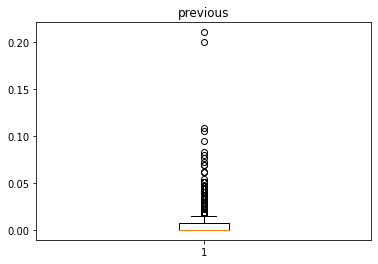

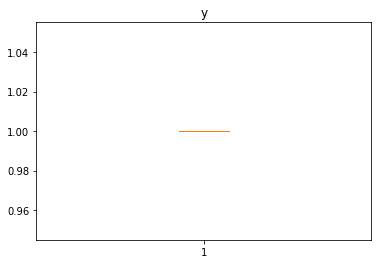

In [ ]:
#정상과 이상 데이터의 변수별 분포 확인 # 정상이 파랑색, 이상이 주황색

for col in dataset.columns:
    #plt.boxplot(Normal[col])
    plt.boxplot(Anomaly[col]) 
    plt.title(col)
    plt.show()

# GDE

## 가우시안 분포 추정 (mu와 sigma 계산. 평균 벡터와 공분산 행렬)

### train 데이터 분포 추정

In [6]:
def estimate_gaussian(dataset):
    mu = np.mean(dataset, axis=0).values
    sigma = np.cov(dataset.T)
    return mu, sigma

mu, sigma = estimate_gaussian(X_train)

print('Dimension of mu:', mu.shape)
print('Dimension of sigma:', sigma.shape)

Dimension of mu: (20,)
Dimension of sigma: (20, 20)


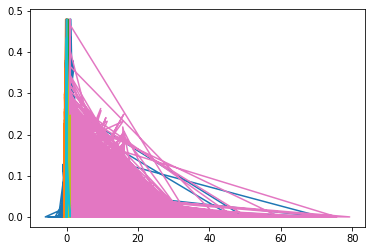

In [7]:
mul = multivariate_normal.pdf(X_train,mean=mu, cov=sigma); mul
plt.plot(X_train, mul)

## 추정된 분포로 train & test 데이터 novelty score 생성

In [8]:
def multivariate_gaussian(dataset, mu, sigma):
    p = multivariate_normal(mean=mu, cov=sigma)
    return - 1.0 * p.logpdf(dataset)

확률값이 높게되면 이 값이 굉장히 낮아짐. 반대로 

확률값이 낮아지면 이 값이 굉장히 높아짐.(양수): 이상치

In [9]:
# train/test 데이터의 -logpdf 값 도출
gauss_train = multivariate_gaussian(X_train, mu, sigma)
gauss_test = multivariate_gaussian(X_test, mu, sigma)

### train/test 데이터의 novelty score 분포 시각화



Text(0.5, 1.0, 'Test Data')

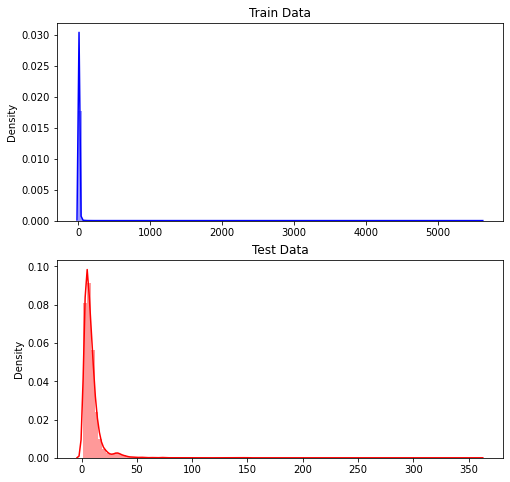

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize = (8, 8)) #2행 1열

sns.distplot(gauss_train, bins=100, color='blue', ax=ax1) #negative log likelihood
# bin=100 : x 계급 구간을 100개로 counting 하겠다.
sns.distplot(gauss_test, bins=100, color='red', ax=ax2)
ax1.set_title("Train Data")
ax2.set_title("Test Data")

## threshold

### best f1 score 방식

In [ ]:
#np.linspace(min(gauss_test), max(gauss_test), 1000)

In [10]:
# score의 min ~ max 범위를 num_step개로 균등 분할한 threshold에 대하여 best threshold 탐색 
def search_best_threshold(score, y_true, num_step):
    best_f1 = 0.5
    best_threshold = None
    for threshold in np.linspace(min(score), max(score), num_step): #min~max사이에 num_step여개 생성
        y_pred = threshold < score # true 값일 거고 threshold > score 이면 false

        f1 = f1_score(y_true, y_pred)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold

    print('Best threshold: ', round(best_threshold, 4))
    print('Best F1 Score:', round(best_f1, 4))
    return best_threshold

In [ ]:
# best threshold 도출
gauss_best_threshold = search_best_threshold(gauss_test, Y_test, num_step=1000)

Best threshold:  3.0351
Best F1 Score: 0.6772


### best threshold 기반 모델 평가

In [ ]:
gauss_scores = pd.DataFrame()
gauss_scores['score'] = list(np.hstack([gauss_train, gauss_test])) # gauss_train, gauss_test붙인거
gauss_scores['anomaly'] = gauss_best_threshold < gauss_scores['score'] #true 값일 거고 threshold > score 이면 false
gauss_scores['anomaly'] = gauss_scores['anomaly'].replace({True: 1, False: 0})
gauss_scores

,score,anomaly
0,3.585227,1
1,5.211291,1
2,2.131223,0
3,4.116147,1
4,10.288209,1
...,...,...
30902,11.895952,1
30903,6.303734,1
30904,10.121333,1
30905,11.792222,1


In [ ]:
gauss_scores.loc[gauss_scores['anomaly'] == 0]

,score,anomaly
2,2.131223,0
12,1.419551,0
13,2.330649,0
24,2.626669,0
31,2.675511,0
...,...,...
30854,3.008409,0
30866,2.451816,0
30876,2.702368,0
30886,2.964558,0


정상인 게 두개 밖에 없다. 뭔가 이상하다.

### FRR, FAR, F1 score 도출

In [21]:
def calculate_metric(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=[1, 0])
    tp, fn, fp, tn = cm.ravel()
    
    frr = fp / (fp + tn)
    far = fn / (fn + tp) 
    
    f1 = f1_score(y_true, y_pred)

    sns.heatmap(pd.DataFrame(cm, columns = ['Predicted', 'Actual']),
            xticklabels=['Abnormal [1]', 'Normal [0]'], 
            yticklabels=['Abnormal [1]', 'Normal [0]'], 
            annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    
    return frr, far, f1

**  FRR: 0.8187  |  FAR: 0.0689  |  F1 Score: 0.6772


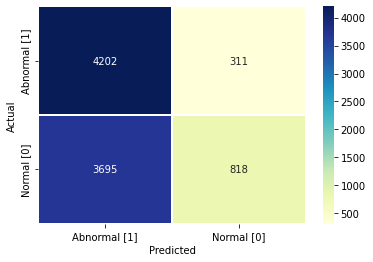

In [ ]:
# test 평가
frr, far, f1 = calculate_metric(Y_test, gauss_scores['anomaly'].iloc[len(gauss_train):])

print("**  FRR: {}  |  FAR: {}  |  F1 Score: {}".format(round(frr, 4), round(far, 4), round(f1, 4)))

'정상'을 '이상'으로 보는 FRR이 0.99 나옴. -> 0.81

**  FRR: 0.8201  |  FAR: nan  |  F1 Score: 0.0


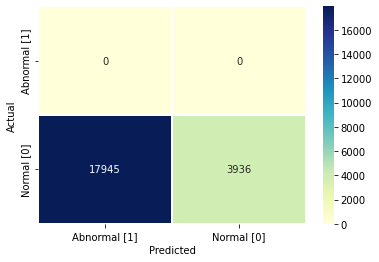

In [ ]:
# train 평가
frr, far, f1 = calculate_metric(Y_train, gauss_scores['anomaly'].iloc[:len(gauss_train)])

print("**  FRR: {}  |  FAR: {}  |  F1 Score: {}".format(round(frr, 4), round(far, 4), round(f1, 4)))

train 에서부터 모든 '정상'을 '이상'으로 보게 됨을 확인

### threshold 변경

#### 실제 이상 개수(4513개)와 비율 맞춰서 threshold 잡기

In [ ]:
len(Anomaly)

4513

In [12]:
for i in range(0,20):
  gauss_best_threshold = i
  gauss_scores = pd.DataFrame()
  gauss_scores['score'] = list(np.hstack([gauss_train, gauss_test])) # gauss_train, gauss_test붙인거
  gauss_scores['anomaly'] = gauss_best_threshold < gauss_scores['score'] #true 값일 거고 threshold > score 이면 false
  gauss_scores['anomaly'] = gauss_scores['anomaly'].replace({True: 1, False: 0})

  print(len(gauss_scores.loc[gauss_scores['anomaly'] == 1]))

30907
30896
29603
25968
22094
18210
14713
11960
9657
7641
5958
4714
3812
3135
2605
2227
1929
1741
1580
1457


In [13]:
gauss_best_threshold = 11

In [14]:
gauss_scores = pd.DataFrame()
gauss_scores['score'] = list(np.hstack([gauss_train, gauss_test])) # gauss_train, gauss_test붙인거
gauss_scores['anomaly'] = gauss_best_threshold < gauss_scores['score'] #true 값일 거고 threshold > score 이면 false
gauss_scores['anomaly'] = gauss_scores['anomaly'].replace({True: 1, False: 0})

len(gauss_scores.loc[gauss_scores['anomaly'] == 1])

4714

In [15]:
4713/30907

0.1524897272462549

**  FRR: 0.1354  |  FAR: 0.7266  |  F1 Score: 0.3882


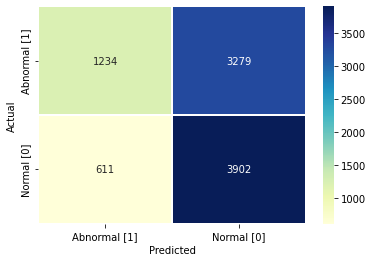

In [16]:
# test 평가
frr, far, f1 = calculate_metric(Y_test, gauss_scores['anomaly'].iloc[len(gauss_train):])

print("**  FRR: {}  |  FAR: {}  |  F1 Score: {}".format(round(frr, 4), round(far, 4), round(f1, 4)))

#### 실제 정상 개수(26394)와 비율 맞춰서 threshold 잡기

In [ ]:
len(Normal)

26394

In [ ]:
gauss_best_threshold = 29

In [ ]:
gauss_scores = pd.DataFrame()
gauss_scores['score'] = list(np.hstack([gauss_train, gauss_test])) # gauss_train, gauss_test붙인거
gauss_scores['anomaly'] = gauss_best_threshold < gauss_scores['score'] #true 값일 거고 threshold > score 이면 false
gauss_scores['anomaly'] = gauss_scores['anomaly'].replace({True: 1, False: 0})

len(gauss_scores.loc[gauss_scores['anomaly'] == 0])

29998

**  FRR: 0.0283  |  FAR: nan  |  F1 Score: 0.0


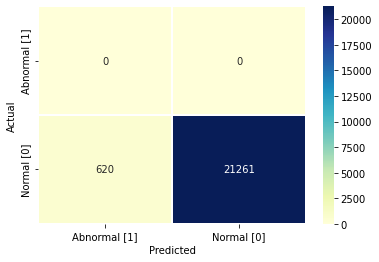

In [ ]:
# train 평가
frr, far, f1 = calculate_metric(Y_train, gauss_scores['anomaly'].iloc[:len(gauss_train)])

print("**  FRR: {}  |  FAR: {}  |  F1 Score: {}".format(round(frr, 4), round(far, 4), round(f1, 4)))

**  FRR: 0.0312  |  FAR: 0.9672  |  F1 Score: 0.0616


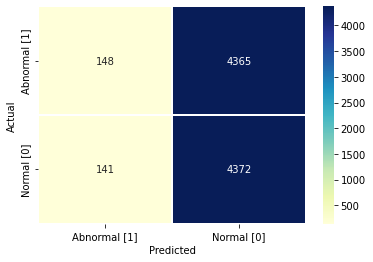

In [ ]:
# test 평가
frr, far, f1 = calculate_metric(Y_test, gauss_scores['anomaly'].iloc[len(gauss_train):])

print("**  FRR: {}  |  FAR: {}  |  F1 Score: {}".format(round(frr, 4), round(far, 4), round(f1, 4)))

'정상'을 '이상'으로 보는 FRR이 많이 낮아졌지만
대신 '이상'을 '정상'으로 보는 FAR이 매우 높아짐을 확인.

#### best threshold 보다 넓게 잡기 (데이터 수정되어 지금 맞지 않음)

best threshold 보다 조금 넓게 25으로 잡아봅니다.

In [ ]:
gauss_best_threshold = 25

In [ ]:
gauss_scores = pd.DataFrame()
gauss_scores['score'] = list(np.hstack([gauss_train, gauss_test])) # gauss_train, gauss_test붙인거
gauss_scores['anomaly'] = gauss_best_threshold < gauss_scores['score'] #true 값일 거고 threshold > score 이면 false
gauss_scores['anomaly'] = gauss_scores['anomaly'].replace({True: 1, False: 0})

len(gauss_scores.loc[gauss_scores['anomaly'] == 0])

29857

**  FRR: 0.0318  |  FAR: nan  |  F1 Score: 0.0


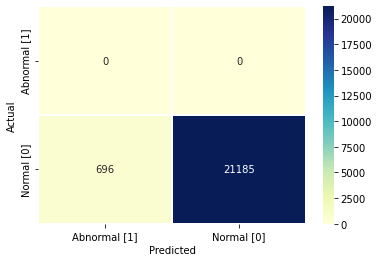

In [ ]:
# train 평가
frr, far, f1 = calculate_metric(Y_train, gauss_scores['anomaly'].iloc[:len(gauss_train)])

print("**  FRR: {}  |  FAR: {}  |  F1 Score: {}".format(round(frr, 4), round(far, 4), round(f1, 4)))

**  FRR: 0.0337  |  FAR: 0.9552  |  F1 Score: 0.083


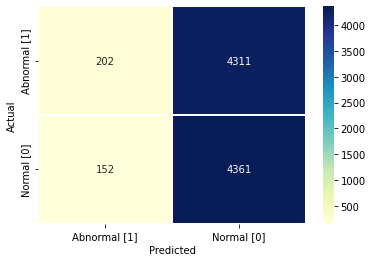

In [ ]:
# test 평가
frr, far, f1 = calculate_metric(Y_test, gauss_scores['anomaly'].iloc[len(gauss_train):])

print("**  FRR: {}  |  FAR: {}  |  F1 Score: {}".format(round(frr, 4), round(far, 4), round(f1, 4)))

'이상'을 '정상'으로 보는 FAR 이 0.511로 조금 낮아졌습니다.

# MOG

### train 데이터 분포 추정

In [1]:
from sklearn.mixture import GaussianMixture

GaussianMixture
- n_components: 가우시안 분포 개수. 디폴트 1
- covariance_type: 공분산 유형 ('full', 'tied', 'diag', 'spherical'). 디폴트 'full'
- max_iter: EM 알고리즘 수행 횟수. 디폴트 100

In [9]:
# Hyperparameter: n_components와 covariance_type 구하기
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ["spherical", "tied", "diag", "full"]
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = GaussianMixture(
            n_components=n_components, covariance_type=cv_type
        )
        gmm.fit(X_train)
        bic.append(gmm.bic(X_train))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm
print("covariance : ", best_gmm.covariance_type)
print("n_components : ", best_gmm.n_components)

covariance :  full
n_components :  6


In [ ]:
# 추정된 혼합 가우시안 분포를 구성하는 각 가우시안 분포의 평균벡터
best_gmm.means_ #변수 20개, 가우시안 6개

array([[ 1.29915838e+00,  1.41057440e-01,  0.00000000e+00,
         5.65589349e-01,  5.92638080e-01,  1.44569789e-01,
         1.65280473e+01,  7.00864143e-01,  4.63550027e-01,
         1.85106552e-01,  3.51501925e-01,  2.40212002e-02,
         4.74109113e-01,  2.24034715e-01,  2.40093521e-01,
         5.36823256e-01,  5.35746833e-01,  6.93953863e-01,
         3.55841772e-01,  1.08342160e-02],
       [-2.85626305e-03,  1.39701956e-01,  1.47789258e-01,
         2.72240334e-01,  9.01380735e-01,  1.17470504e-01,
         0.00000000e+00,  6.18386893e-01,  1.64450266e-01,
         2.82716054e-01,  3.09814445e-01,  5.38488135e-02,
         5.30207020e-01,  1.50476148e-01,  2.89557992e-01,
         4.77712282e-01,  6.08520225e-01,  2.83008903e-01,
         5.95525509e-01,  0.00000000e+00],
       [ 1.08477356e+00,  7.94504738e-03,  4.86123575e-01,
         6.93184492e-01,  3.98709709e-01,  1.01364546e-01,
         2.01265049e+01,  3.90899987e-01,  1.73186649e-01,
         3.23725464e-01,  2.6

In [ ]:
# 추정된 혼합 가우시안 분포를 구성하는 각 가우시안 분포의 공분산
best_gmm.covariances_

array([[[ 1.33573023e+01,  1.04928085e-01,  0.00000000e+00, ...,
         -2.75231792e-01,  2.81207644e-02, -7.07878461e-03],
        [ 1.04928085e-01,  6.12110034e-01,  0.00000000e+00, ...,
          4.36062141e-03,  6.77486342e-03, -5.91664755e-04],
        [ 0.00000000e+00,  0.00000000e+00,  1.00000000e-06, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [-2.75231792e-01,  4.36062141e-03,  0.00000000e+00, ...,
          2.12382899e-01, -1.24865571e-02, -4.42414947e-04],
        [ 2.81207644e-02,  6.77486342e-03,  0.00000000e+00, ...,
         -1.24865571e-02,  2.29219405e-01, -2.31589682e-04],
        [-7.07878461e-03, -5.91664755e-04,  0.00000000e+00, ...,
         -4.42414947e-04, -2.31589682e-04,  1.32700313e-04]],

       [[ 4.46917428e-01, -2.18052124e-03, -5.77546254e-02, ...,
          3.12083025e-02, -2.80313308e-02,  0.00000000e+00],
        [-2.18052124e-03,  8.43703991e-01, -2.54188488e-03, ...,
         -2.11770191e-03,  3.63568678e

In [ ]:
# 추정된 혼합 가우시안 분포를 구성하는 각 가우시안 분포의 가중치
best_gmm.weights_

array([0.03891203, 0.10699571, 0.00451258, 0.31725844, 0.12021559,
       0.41210565])

## 추정된 분포로 train & test 데이터 novelty score 생성

In [10]:
# train/test 데이터의 -logpdf 도출
gmm_train = - 1.0 * best_gmm.score_samples(X_train) #sample마다 score 뽑음
gmm_test = - 1.0 * best_gmm.score_samples(X_test)

### train/test 데이터의 novelty score 분포 시각화

Text(0.5, 1.0, 'Test Data')

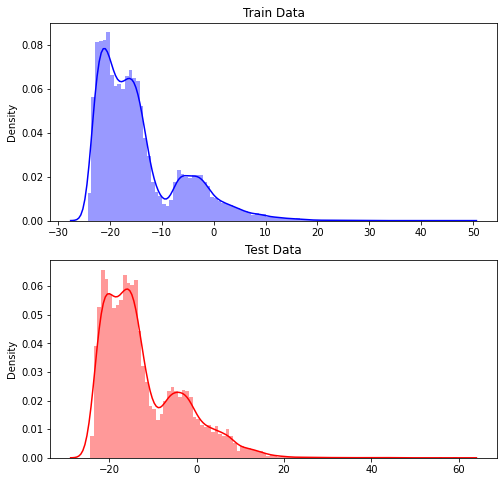

In [11]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize = (8, 8))

sns.distplot(gmm_train, bins=100, kde=True, color='blue', ax=ax1)
sns.distplot(gmm_test, bins=100, kde=True, color='red', ax=ax2)

ax1.set_title("Train Data")
ax2.set_title("Test Data")

## threshold

### 퍼센트 방식

In [16]:
# threshold 설정(퍼센트) -> 이상치 15% 이상 값
pct_threshold = np.percentile(gmm_test, 85)
print(f'The threshold of the score is {pct_threshold:.2f}')

The threshold of the score is -2.02


### 퍼센트 기반 모델 평가

In [17]:
gmm_scores = pd.DataFrame()
gmm_scores['score'] = list(np.hstack([gmm_train, gmm_test])) # gauss_train, gauss_test붙인거
gmm_scores['anomaly'] = gmm_scores['score'].apply(lambda x: 1 if x > pct_threshold else 0)
gmm_scores

,score,anomaly
0,-20.322064,0
1,-20.098216,0
2,-18.136626,0
3,-16.914828,0
4,-13.339472,0
...,...,...
30902,1.157787,1
30903,-5.467697,0
30904,-12.469593,0
30905,-12.064845,0


In [15]:
gmm_scores['score'].describe()

count    30907.000000
mean       -13.729680
std          8.444948
min        -24.380970
25%        -20.150583
50%        -16.104521
75%         -9.420933
max         59.603372
Name: score, dtype: float64

In [18]:
len(gmm_scores.loc[gmm_scores['anomaly'] == 1])

3458

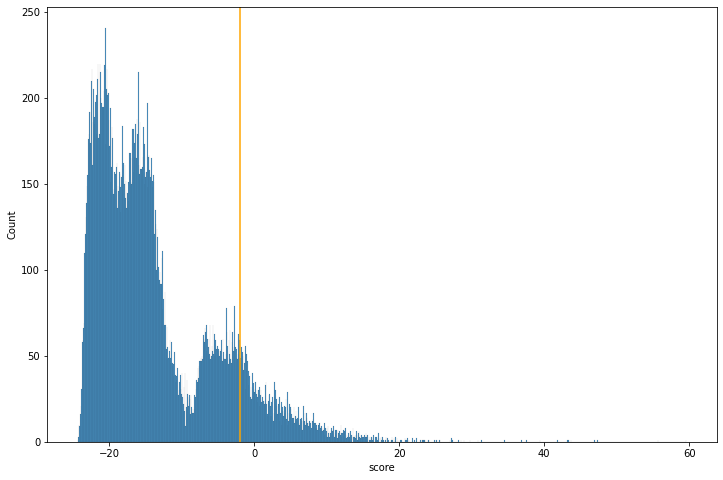

In [19]:
# 그래프 그리기
plt.figure(figsize=(12, 8))
# score 분포
sns.histplot(gmm_scores['score'], bins=1000, alpha=0.8)

# Threshold 값(값 지정)
plt.axvline(x=pct_threshold, color='orange')


### FRR, FAR, F1 score 도출

**  FRR: 0.0993  |  FAR: 0.7992  |  F1 Score: 0.3088


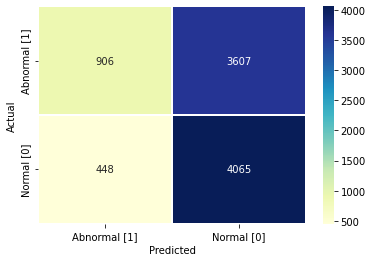

In [22]:
# test 평가
frr, far, f1 = calculate_metric(Y_test, gmm_scores['anomaly'].iloc[len(gmm_train):])

print("**  FRR: {}  |  FAR: {}  |  F1 Score: {}".format(round(frr, 4), round(far, 4), round(f1, 4)))

FAR 이 너무 안 좋아서 F1 Score도 낮다.

**  FRR: 0.0346  |  FAR: nan  |  F1 Score: 0.0


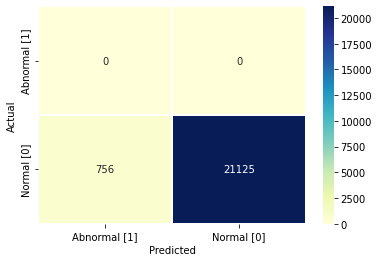

In [ ]:
# train 평가
frr, far, f1 = calculate_metric(Y_train, gmm_scores['anomaly'].iloc[:len(gmm_train)])

print("**  FRR: {}  |  FAR: {}  |  F1 Score: {}".format(round(frr, 4), round(far, 4), round(f1, 4)))

### best f1 score 방식

In [ ]:
gmm_best_threshold = search_best_threshold(gmm_test, Y_test, num_step=1000)

Best threshold:  -24.9178
Best F1 Score: 0.6872


### best threshold 기반 모델 평가

In [ ]:
gmm_scores2 = pd.DataFrame()
gmm_scores2['score'] = list(np.hstack([gmm_train, gmm_test])) # gauss_train, gauss_test붙인거
gmm_scores2['anomaly'] = gmm_best_threshold < gmm_scores2['score'] #true 값일 거고 threshold > score 이면 false
gmm_scores2['anomaly'] = gmm_scores2['anomaly'].replace({True: 1, False: 0})
gmm_scores2

,score,anomaly
0,-18.902874,1
1,-26.105638,0
2,-18.760368,1
3,-17.878850,1
4,-13.898665,1
...,...,...
30902,-4.374758,1
30903,-5.631658,1
30904,-10.000681,1
30905,-11.502387,1


In [ ]:
gmm_scores2.loc[gmm_scores2['anomaly'] == 0]

,score,anomaly
1,-26.105638,0
20,-27.364465,0
24,-27.739103,0
50,-25.472390,0
54,-27.455366,0
...,...,...
30634,-25.093912,0
30824,-28.636236,0
30826,-26.550963,0
30847,-28.421989,0


### FRR, FAR, F1 score 도출

**  FRR: 0.7995  |  FAR: 0.0581  |  F1 Score: 0.6872


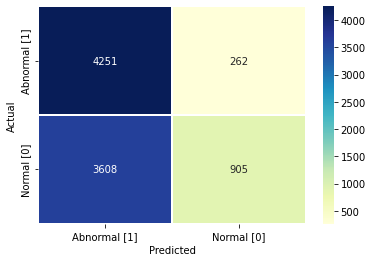

In [ ]:
# test 평가
frr, far, f1 = calculate_metric(Y_test, gmm_scores2['anomaly'].iloc[len(gmm_train):])

print("**  FRR: {}  |  FAR: {}  |  F1 Score: {}".format(round(frr, 4), round(far, 4), round(f1, 4)))

'정상'을 '이상'으로 보는 FRR이 많이 높음을 확인

**  FRR: 0.802  |  FAR: nan  |  F1 Score: 0.0


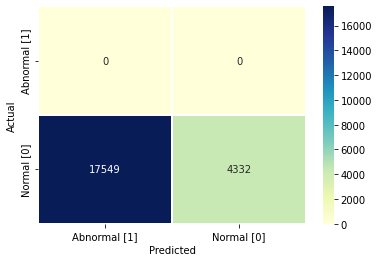

In [ ]:
# train 평가
frr, far, f1 = calculate_metric(Y_train, gmm_scores2['anomaly'].iloc[:len(gmm_train)])

print("**  FRR: {}  |  FAR: {}  |  F1 Score: {}".format(round(frr, 4), round(far, 4), round(f1, 4)))

### threshold 변경

In [23]:
for i in range(-10,5):
    gmm_best_threshold = i
    gmm_scores2 = pd.DataFrame()
    gmm_scores2['score'] = list(np.hstack([gmm_train, gmm_test])) # gauss_train, gauss_test붙인거
    gmm_scores2['anomaly'] = gmm_best_threshold < gmm_scores2['score'] #true 값일 거고 threshold > score 이면 false
    gmm_scores2['anomaly'] = gmm_scores2['anomaly'].replace({True: 1, False: 0})

    print(len(gmm_scores2.loc[gmm_scores2['anomaly'] == 1]))

7903
7590
7326
6784
6076
5419
4788
4118
3443
2881
2476
2140
1855
1582
1349


In [24]:
gmm_best_threshold = -3

In [25]:
gmm_scores2 = pd.DataFrame()
gmm_scores2['score'] = list(np.hstack([gmm_train, gmm_test])) # gauss_train, gauss_test붙인거
gmm_scores2['anomaly'] = gmm_best_threshold < gmm_scores2['score'] #true 값일 거고 threshold > score 이면 false
gmm_scores2['anomaly'] = gmm_scores2['anomaly'].replace({True: 1, False: 0})
len(gmm_scores2.loc[gmm_scores2['anomaly'] == 1])

4118

**  FRR: 0.117  |  FAR: 0.7682  |  F1 Score: 0.3437


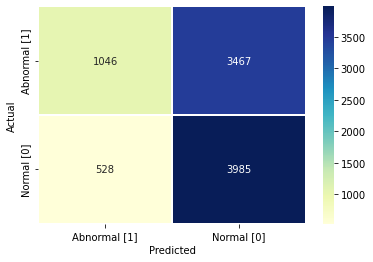

In [26]:
# test 평가
frr, far, f1 = calculate_metric(Y_test, gmm_scores2['anomaly'].iloc[len(gmm_train):])

print("**  FRR: {}  |  FAR: {}  |  F1 Score: {}".format(round(frr, 4), round(far, 4), round(f1, 4)))

**  FRR: 0.0068  |  FAR: nan  |  F1 Score: 0.0


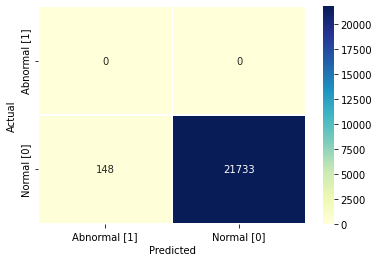

In [ ]:
# train 평가
frr, far, f1 = calculate_metric(Y_train, gmm_scores2['anomaly'].iloc[:len(gmm_train)])

print("**  FRR: {}  |  FAR: {}  |  F1 Score: {}".format(round(frr, 4), round(far, 4), round(f1, 4)))

#### 실제 정상 개수(26394)와 비율 맞춰서 threshold 잡기

In [ ]:
for i in range(-20,20):
    gmm_best_threshold = i
    gmm_scores2 = pd.DataFrame()
    gmm_scores2['score'] = list(np.hstack([gmm_train, gmm_test])) # gauss_train, gauss_test붙인거
    gmm_scores2['anomaly'] = gmm_best_threshold < gmm_scores2['score'] #true 값일 거고 threshold > score 이면 false
    gmm_scores2['anomaly'] = gmm_scores2['anomaly'].replace({True: 1, False: 0})

    print(len(gmm_scores2.loc[gmm_scores2['anomaly'] == 0]))

9660
11121
12785
14549
16062
17336
18600
19564
20311
21136
22144
23038
23806
24727
25694
26431
27007
27458
27843
28232
28562
28890
29214
29486
29739
29927
30080
30189
30303
30396
30470
30539
30587
30636
30683
30716
30742
30760
30781
30795


In [ ]:
gmm_best_threshold = 17

In [ ]:
gmm_scores2 = pd.DataFrame()
gmm_scores2['score'] = list(np.hstack([gmm_train, gmm_test])) # gauss_train, gauss_test붙인거
gmm_scores2['anomaly'] = gmm_best_threshold < gmm_scores2['score'] #true 값일 거고 threshold > score 이면 false
gmm_scores2['anomaly'] = gmm_scores2['anomaly'].replace({True: 1, False: 0})
len(gmm_scores2.loc[gmm_scores2['anomaly'] == 0])

30760

**  FRR: 0.004  |  FAR: 0.9869  |  F1 Score: 0.0257


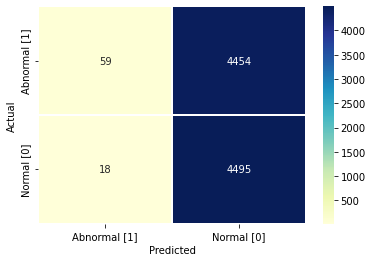

In [ ]:
# test 평가
frr, far, f1 = calculate_metric(Y_test, gmm_scores2['anomaly'].iloc[len(gmm_train):])

print("**  FRR: {}  |  FAR: {}  |  F1 Score: {}".format(round(frr, 4), round(far, 4), round(f1, 4)))

'정상'을 '이상'으로 보는 FRR이 많이 낮아졌지만 대신 '이상'을 '정상'으로 보는 FAR가 50%을 넘김을 확인.

**  FRR: 0.0032  |  FAR: nan  |  F1 Score: 0.0


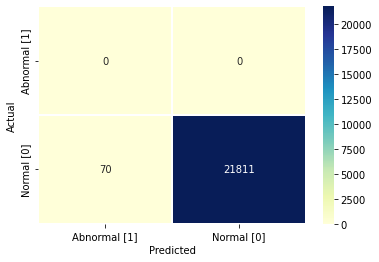

In [ ]:
# train 평가
frr, far, f1 = calculate_metric(Y_train, gmm_scores2['anomaly'].iloc[:len(gmm_train)])

print("**  FRR: {}  |  FAR: {}  |  F1 Score: {}".format(round(frr, 4), round(far, 4), round(f1, 4)))